In [32]:
import random
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import math
import sys

In [33]:
growthRate = 0.2
initialInvestment = 10
maxWithdrawals = 70
numTrials = 100

In [34]:
def runTrial(growthRate,maxWithdrawals,initialInvestment):
        rewards = [initialInvestment,initialInvestment*(1+growthRate),initialInvestment*(1+growthRate)*(1+growthRate)]
        rewardParameter = growthRate
        numWithdrawals = 0
        withdrawParameter = 0
        peopleList = []
        for i in range(0,100):
            peopleList.append([random.normalvariate(.5,.5/3),0,i,0])
        for roundNum in range (0,3):
            if numWithdrawals < maxWithdrawals:
                for person in peopleList:
                    if numWithdrawals < maxWithdrawals:
                        if not person[1] == 1:
                            num = random.random()
                            currentRiskAversionParam = person[0]+withdrawParameter-rewardParameter
                            if num < currentRiskAversionParam:
                                numWithdrawals = numWithdrawals + 1
                                person[1]=1
                                withdrawParameter = numWithdrawals/100
                                person[3] = rewards[roundNum]
        if numWithdrawals < maxWithdrawals:
            return 0
        else:
            return 1

In [37]:
x = []
y = []
for inc in range(0,100,1):
        growthRate = float(inc)/100
        closeSum = 0
        for i in range(0,numTrials):
            closeSum = closeSum + runTrial(growthRate,maxWithdrawals,initialInvestment)
        fractionClose = float(closeSum)/numTrials
        print str(growthRate) + " : " + str(fractionClose)
        x.append(growthRate)
        y.append(fractionClose)
        

0.0 : 1.0
0.01 : 1.0
0.02 : 1.0
0.03 : 1.0
0.04 : 0.98
0.05 : 0.99
0.06 : 0.99
0.07 : 0.94
0.08 : 0.94
0.09 : 0.85
0.1 : 0.8
0.11 : 0.75
0.12 : 0.63
0.13 : 0.56
0.14 : 0.49
0.15 : 0.31
0.16 : 0.25
0.17 : 0.13
0.18 : 0.1
0.19 : 0.05
0.2 : 0.01
0.21 : 0.04
0.22 : 0.01
0.23 : 0.01
0.24 : 0.0
0.25 : 0.0
0.26 : 0.0
0.27 : 0.0
0.28 : 0.0
0.29 : 0.0
0.3 : 0.0
0.31 : 0.0
0.32 : 0.0
0.33 : 0.0
0.34 : 0.0
0.35 : 0.0
0.36 : 0.0
0.37 : 0.0
0.38 : 0.0
0.39 : 0.0
0.4 : 0.0
0.41 : 0.0
0.42 : 0.0
0.43 : 0.0
0.44 : 0.0
0.45 : 0.0
0.46 : 0.0
0.47 : 0.0
0.48 : 0.0
0.49 : 0.0
0.5 : 0.0
0.51 : 0.0
0.52 : 0.0
0.53 : 0.0
0.54 : 0.0
0.55 : 0.0
0.56 : 0.0
0.57 : 0.0
0.58 : 0.0
0.59 : 0.0
0.6 : 0.0
0.61 : 0.0
0.62 : 0.0
0.63 : 0.0
0.64 : 0.0
0.65 : 0.0
0.66 : 0.0
0.67 : 0.0
0.68 : 0.0
0.69 : 0.0
0.7 : 0.0
0.71 : 0.0
0.72 : 0.0
0.73 : 0.0
0.74 : 0.0
0.75 : 0.0
0.76 : 0.0
0.77 : 0.0
0.78 : 0.0
0.79 : 0.0
0.8 : 0.0
0.81 : 0.0
0.82 : 0.0
0.83 : 0.0
0.84 : 0.0
0.85 : 0.0
0.86 : 0.0
0.87 : 0.0
0.88 : 0.0
0.89 : 0.0
0

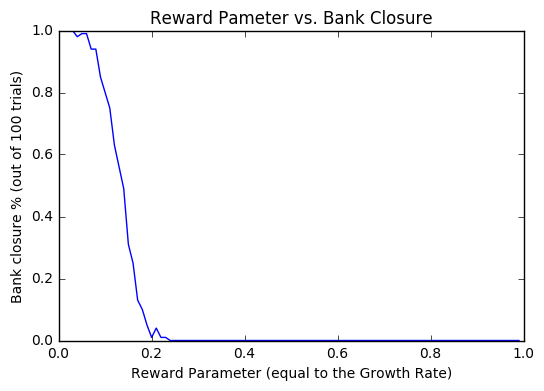

In [39]:
plt.plot(x,y)
plt.xlabel("Reward Parameter (equal to the Growth Rate)")
plt.ylabel("Bank closure % (out of 100 trials)")
plt.title("Reward Pameter vs. Bank Closure")
plt.show()